In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import bibtexparser
import fitz
import requests
from PyPDF2 import PdfReader
from newspaper import Article, Config
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer
import os
import fitz 
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import precision_score, recall_score, f1_score
from nltk.corpus import wordnet
import string


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

!pip install newspaper3k
!pip install sumy
!pip install lxml_html_clean
!pip install scikit-learn

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Oladele\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Oladele\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Oladele\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [268]:
article_df = pd.read_csv('Documents\Thesis\Analysis\Downloaded\corpusAll.csv')
article_df.head(2)

,Key,Item Type,Publication Year,Author,Title,Publication Title,ISBN,ISSN,DOI,Url,...,Programming Language,Version,System,Code,Code Number,Section,Session,Committee,History,Legislative Body
0,IEIZKBAV,journalArticle,2017.0,"McConaghy, Masha; McMullen, Greg; Parry, Glenn...",Visibility and digital art: Blockchain as an o...,Strategic Change,NaN,"1086-1718, 1099-1697",10.1002/jsc.2146,https://onlinelibrary.wiley.com/doi/10.1002/js...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,KLWHL6DC,conferencePaper,2008.0,"Jäppinen, Pekka; Hämäläinen, Harri",Enhanced RFID security method with ownership t...,2008 International Conference on Computational...,NaN,NaN,NaN,https://ieeexplore.ieee.org/abstract/document/...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [269]:
len(article_df)


284

In [270]:
# Convert the Publication Year column data type to datetime64[ns]
article_df['Publication Year'] = pd.to_datetime(article_df['Publication Year'], format='%Y')
# Extract only the year part
article_df['Year'] = article_df['Publication Year'].dt.year.astype('Int64')
article_df.head(2) 

,Key,Item Type,Publication Year,Author,Title,Publication Title,ISBN,ISSN,DOI,Url,...,Version,System,Code,Code Number,Section,Session,Committee,History,Legislative Body,Year
0,IEIZKBAV,journalArticle,2017-01-01,"McConaghy, Masha; McMullen, Greg; Parry, Glenn...",Visibility and digital art: Blockchain as an o...,Strategic Change,NaN,"1086-1718, 1099-1697",10.1002/jsc.2146,https://onlinelibrary.wiley.com/doi/10.1002/js...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
1,KLWHL6DC,conferencePaper,2008-01-01,"Jäppinen, Pekka; Hämäläinen, Harri",Enhanced RFID security method with ownership t...,2008 International Conference on Computational...,NaN,NaN,NaN,https://ieeexplore.ieee.org/abstract/document/...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008


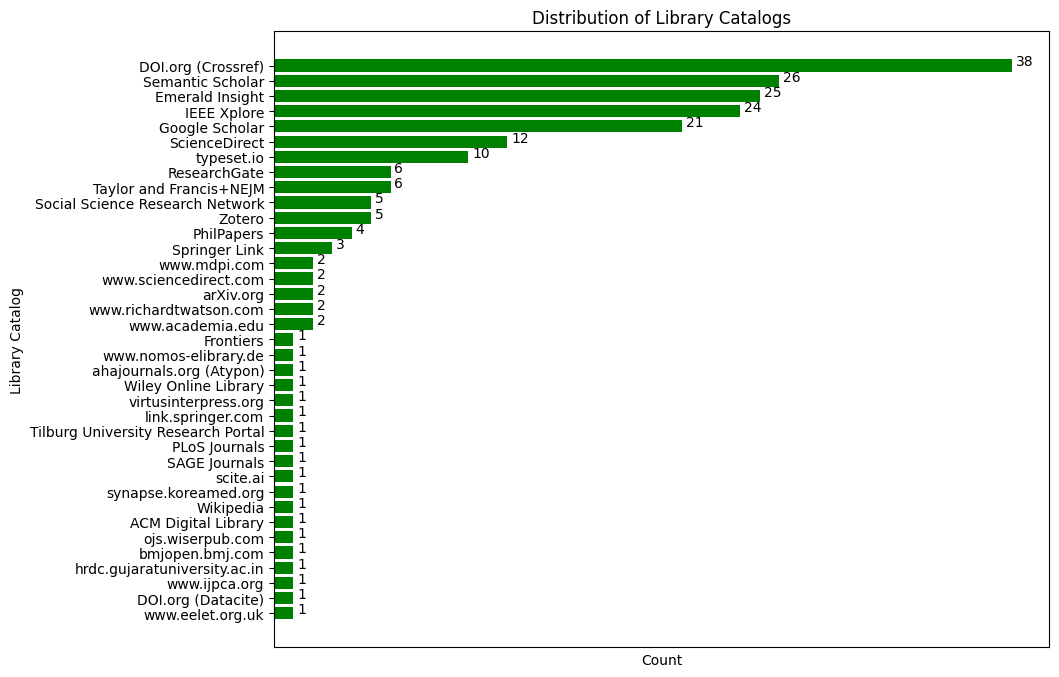

In [271]:
# Get unique values in the 'Library Catalog' column
library_catalog = article_df['Library Catalog'].unique()

# Count occurrences of each library Catalog
library_catalog_counts = article_df['Library Catalog'].value_counts()

# Sort the counts in ascending order
library_catalog_counts = library_catalog_counts.sort_values(ascending=True)

# Plot a horizontal bar chart
plt.figure(figsize=(10, 8))
bars = plt.barh(library_catalog_counts.index, library_catalog_counts, color='green')

# Add data labels to the bars
for index, value in enumerate(library_catalog_counts):
    plt.text(value + 0.2, index, str(value))

# Set plot title and axis labels
plt.title('Distribution of Library Catalogs')
plt.xlabel('Count')
plt.ylabel('Library Catalog')

# Remove x-ticks
plt.xticks([])

# Show the plot
plt.show()

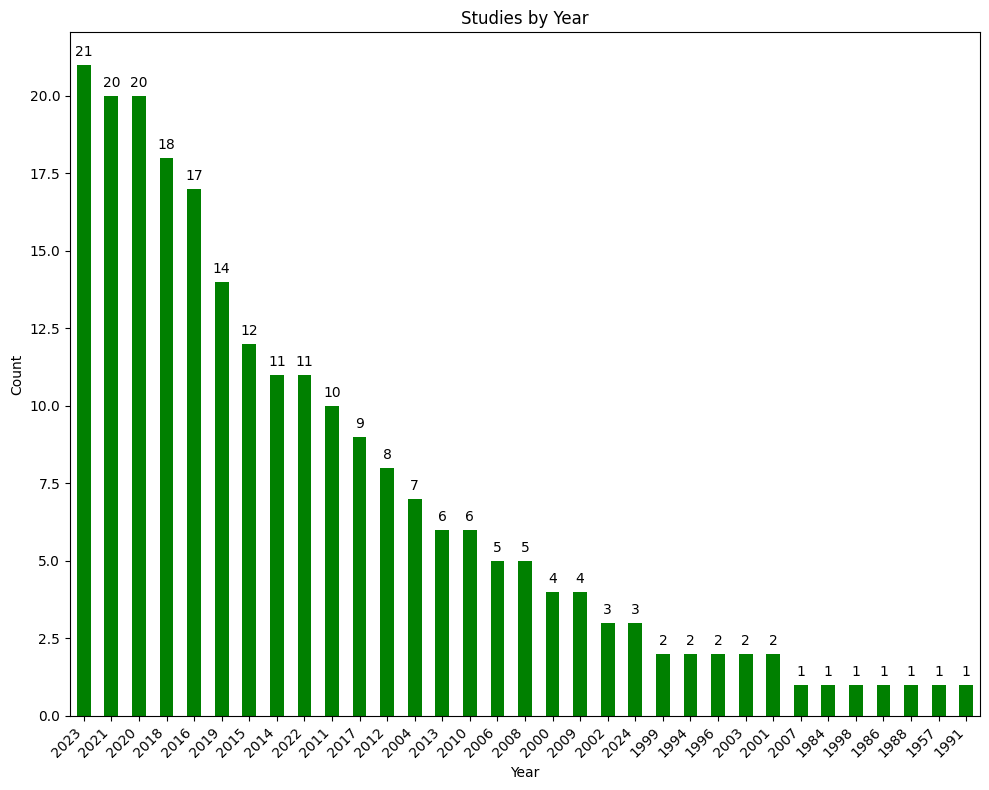

In [272]:
# Plot a bar chart for year of document
plt.figure(figsize=(10, 8))
#Count of each studies by Year
year_counts = article_df['Year'].value_counts()
year_counts.plot(kind='bar', color='green')
plt.title('Studies by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Add counts on top of each bar
for i, count in enumerate(year_counts):
    plt.text(i, count + 0.2, str(count), ha='center', va='bottom')

plt.tight_layout()

# Show the plot
plt.show()

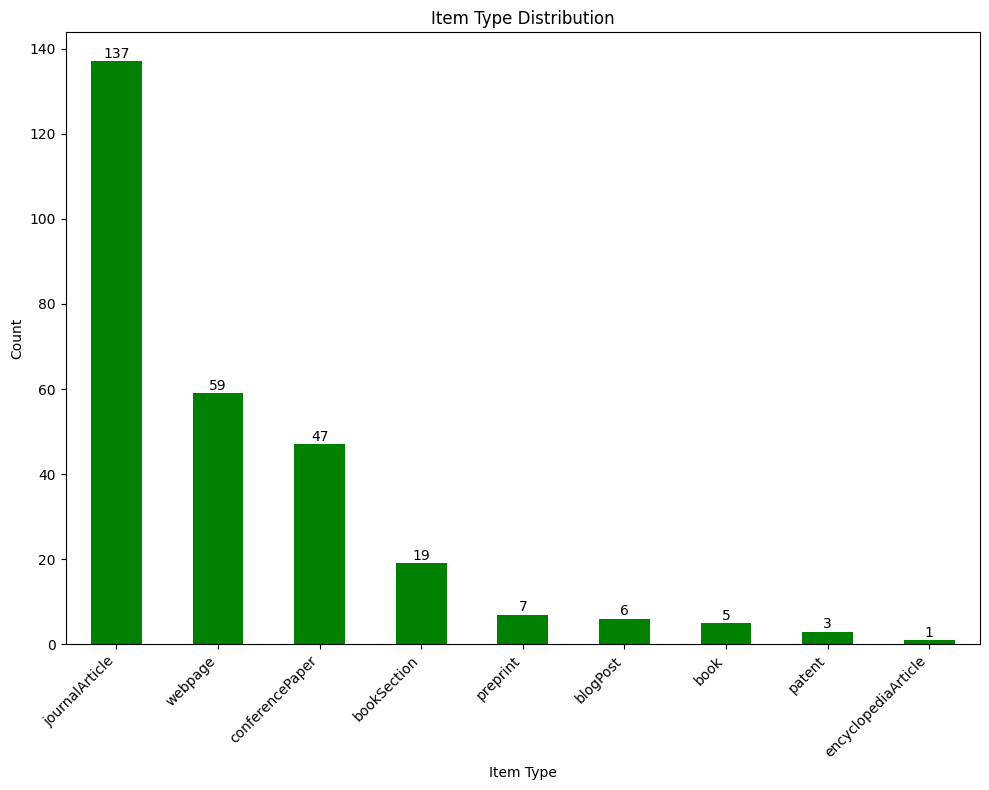

In [273]:
# Check the unique values in the 'Item Type' column
item_types = article_df['Item Type'].unique()
# Count the occurrences of each item type
item_type_counts = article_df['Item Type'].value_counts()
# Plot a bar chart
plt.figure(figsize=(10, 8))
item_type_counts.plot(kind='bar', color='green')
# Add counts on top of each bar
for i, count in enumerate(item_type_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.title('Item Type Distribution')
plt.xlabel('Item Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# Show the plot
plt.show()


In [274]:
# the column names are different on both database, standardizing the columns
article_df.rename(columns={'Title': 'title', 'Abstract Note': 'abstract','Author': 'author','Publication Year': 'date','Item Type': 'type','Url': 'link','Library Identifier': 'identifier','Library Catalog':'catalogs','Language':'language','Conference Name':'Conference Names','Pages':'pages','Year':'year'}, inplace=True)

# Ensure both DataFrames only contain the columns you need
columns_to_keep = ['title', 'abstract', 'author', 'year','type', 'link','pages','language','catalogs']

In [275]:
# Get the intersection of columns to keep and existing columns in each DataFrame
columns_to_keep_df = [col for col in columns_to_keep if col in article_df.columns]

# Apply the filtered columns
corpusDF = article_df[columns_to_keep_df]
corpusDF.head(2)

,title,abstract,author,year,type,link,pages,language,catalogs
0,Visibility and digital art: Blockchain as an o...,Abstract Visibility of digital art...,"McConaghy, Masha; McMullen, Greg; Parry, Glenn...",2017,journalArticle,https://onlinelibrary.wiley.com/doi/10.1002/js...,461-470,en,DOI.org (Crossref)
1,Enhanced RFID security method with ownership t...,NaN,"Jäppinen, Pekka; Hämäläinen, Harri",2008,conferencePaper,https://ieeexplore.ieee.org/abstract/document/...,382–385,NaN,Google Scholar


In [276]:
len(corpusDF)

284

**DATA PREPROCESSING**

In [277]:
# Drop duplicates based on 'title' and 'abstract'
corpusDF.drop_duplicates(subset=['title', 'abstract'], inplace=True)
len(corpusDF)   

C:\Users\Oladele\AppData\Local\Temp\ipykernel_14116\1101826717.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corpusDF.drop_duplicates(subset=['title', 'abstract'], inplace=True)


281

In [278]:
#cleaning data data
# clean the dataframe and remove stop words and convert to lower case

# Convert text columns to lowercase and remove punctuation (and optionally, digits)
corpusDF['title'] = corpusDF['title'].str.lower().str.replace('[^\w\s]', '', regex=True)
corpusDF['abstract'] = corpusDF['abstract'].str.lower().str.replace('[^\w\s]', '', regex=True)

# Optional: Remove digits if they're not relevant
corpusDF['title'] = corpusDF['title'].str.replace('\d+', '', regex=True)
corpusDF['abstract'] = corpusDF['abstract'].str.replace('\d+', '', regex=True)
corpusDF.head(2)

C:\Users\Oladele\AppData\Local\Temp\ipykernel_14116\2252112660.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corpusDF['title'] = corpusDF['title'].str.lower().str.replace('[^\w\s]', '', regex=True)
C:\Users\Oladele\AppData\Local\Temp\ipykernel_14116\2252112660.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corpusDF['abstract'] = corpusDF['abstract'].str.lower().str.replace('[^\w\s]', '', regex=True)
C:\Users\Oladele\AppData\Local\Temp\ipykernel_14116\2252112660.py:9: SettingWithCopyWarning: 
A va

,title,abstract,author,year,type,link,pages,language,catalogs
0,visibility and digital art blockchain as an ow...,abstract visibility of digital art...,"McConaghy, Masha; McMullen, Greg; Parry, Glenn...",2017,journalArticle,https://onlinelibrary.wiley.com/doi/10.1002/js...,461-470,en,DOI.org (Crossref)
1,enhanced rfid security method with ownership t...,NaN,"Jäppinen, Pekka; Hämäläinen, Harri",2008,conferencePaper,https://ieeexplore.ieee.org/abstract/document/...,382–385,NaN,Google Scholar


In [279]:
records_without_abstract = corpusDF[corpusDF['abstract'].isna() | (corpusDF['abstract'] == '')]
records_without_abstract.head(4)
print(len(records_without_abstract)) 

90


In [280]:
print(records_without_abstract['link'])

1      https://ieeexplore.ieee.org/abstract/document/...
2      https://ieeexplore.ieee.org/abstract/document/...
3      https://ieeexplore.ieee.org/abstract/document/...
5      https://ojs.aaai.org/aimagazine/index.php/aima...
6      https://www.sciencedirect.com/science/article/...
                             ...                        
276    https://academic.oup.com/tandt/article/24/6/48...
278    https://link.springer.com/article/10.1007/s106...
279    https://linkinghub.elsevier.com/retrieve/pii/S...
281    https://www.nomos-elibrary.de/10.5771/97838452...
282    http://www.nomos-elibrary.de/index.php?doi=10....
Name: link, Length: 90, dtype: object


In [281]:
# Convert float values to strings in the 'link' column
records_without_abstract['link'] = records_without_abstract['link'].astype(str)

# Include link rows that are NaN, empty strings, or do not contain "http" or "https"
result_links = records_without_abstract.loc[
    records_without_abstract['link'].isna() | 
    (records_without_abstract['link'] == '') | 
    (~records_without_abstract['link'].str.startswith(('http://', 'https://')))
]

# Display the details of the link column without NaN values and links that do not start with "http" or "https"
print(result_links)

                                                title abstract  \
21  to own is to be perceived to own a social cogn...      NaN   
55  logged out ownership exclusion and public valu...      NaN   
56  rethinking the ownership of information in the...      NaN   
57  the withering away of property the rise of the...      NaN   
58           on the value of the intellectual commons      NaN   
93  ownership of problems intellectual property an...      NaN   

                                 author  year            type link    pages  \
21                        Rudmin, Floyd  1991  journalArticle  nan   85-104   
55                   Prainsack, Barbara  2019  journalArticle  nan      NaN   
56  Lipinski, Tomas A.; Britz, Johannes  2000  journalArticle  nan    49–71   
57                          Cahir, John  2004  journalArticle  nan  619–641   
58                        Wilson, James  2012     bookSection  nan      NaN   
93                     Okpaku, Joseph O  <NA>  journalArticle  

C:\Users\Oladele\AppData\Local\Temp\ipykernel_14116\1360111340.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  records_without_abstract['link'] = records_without_abstract['link'].astype(str)


In [282]:
len(result_links)

6

In [283]:
# Removing rows corresponding to result_links from records_without_abstract
records_without_abstract = records_without_abstract.drop(result_links.index)

# Display the updated records_without_abstract
print(records_without_abstract)

                                                 title abstract  \
1    enhanced rfid security method with ownership t...      NaN   
2    a new rfid authentication protocol with owners...      NaN   
3    an efficient and secure rfid security method w...      NaN   
5        artificial intelligence employment and income      NaN   
6      rfid ownership transfer protocol based on cloud      NaN   
..                                                 ...      ...   
276               digital progress and property rights      NaN   
278  property rights theory bundles of rights on io...      NaN   
279  a review of code reviewer recommendation studi...      NaN   
281          titeleiinhaltsverzeichnis  nomos elibrary      NaN   
282  the ownership problems of overlaps in european...      NaN   

                                                author  year             type  \
1                   Jäppinen, Pekka; Hämäläinen, Harri  2008  conferencePaper   
2                          Wang, 

In [284]:
len(records_without_abstract)

84

In [285]:
records_without_abstract['catalogs'].head(2)

1    Google Scholar
2    Google Scholar
Name: catalogs, dtype: object

##### **Extracting texts from the  records as abstract**

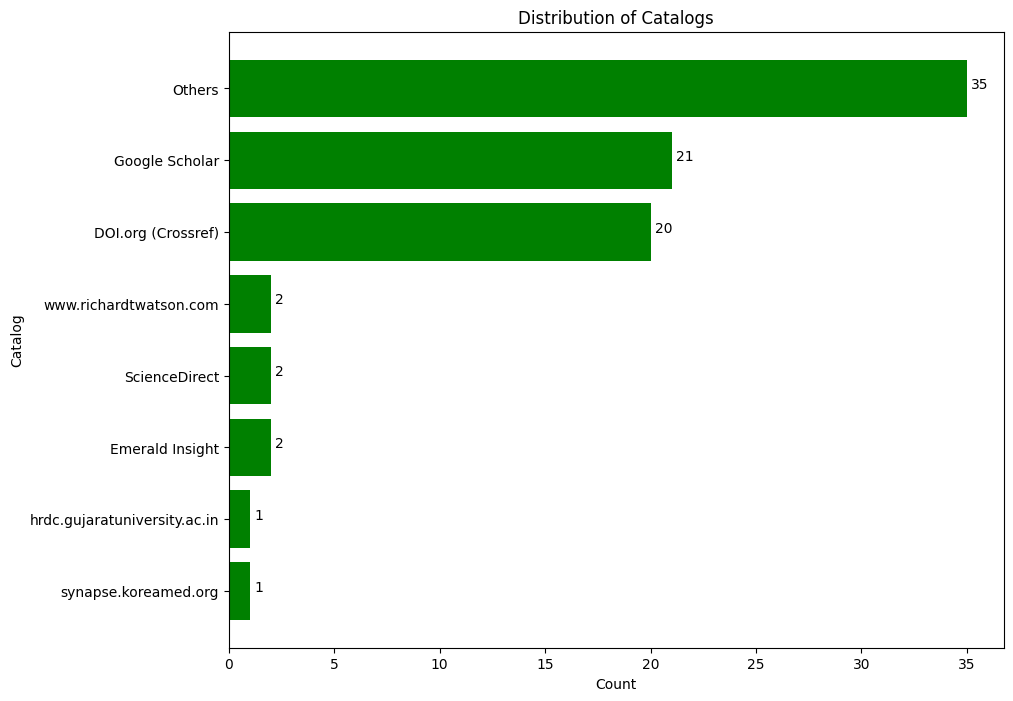

In [286]:
# Get counts of each catalog
catalog_counts = records_without_abstract['catalogs'].value_counts()

# Extract rows where 'catalogs' value is NaN and count the occurrences
others_count = records_without_abstract['catalogs'].isna().sum()

# If there are NaN values, add them to the 'Others' category
if others_count > 0:
    catalog_counts['Others'] = others_count

# Sort the catalog counts in ascending order
catalog_counts = catalog_counts.sort_values(ascending=True)

# Plot a horizontal bar chart
plt.figure(figsize=(10, 8))
bars = plt.barh(catalog_counts.index, catalog_counts.values, color='green')

# Add data labels to the bars
for index, value in enumerate(catalog_counts.values):
   plt.text(value + 0.2, index, str(value))

# Set plot title and axis labels
plt.title('Distribution of Catalogs')
plt.xlabel('Count')
plt.ylabel('Catalog')

# Show the plot
plt.show()

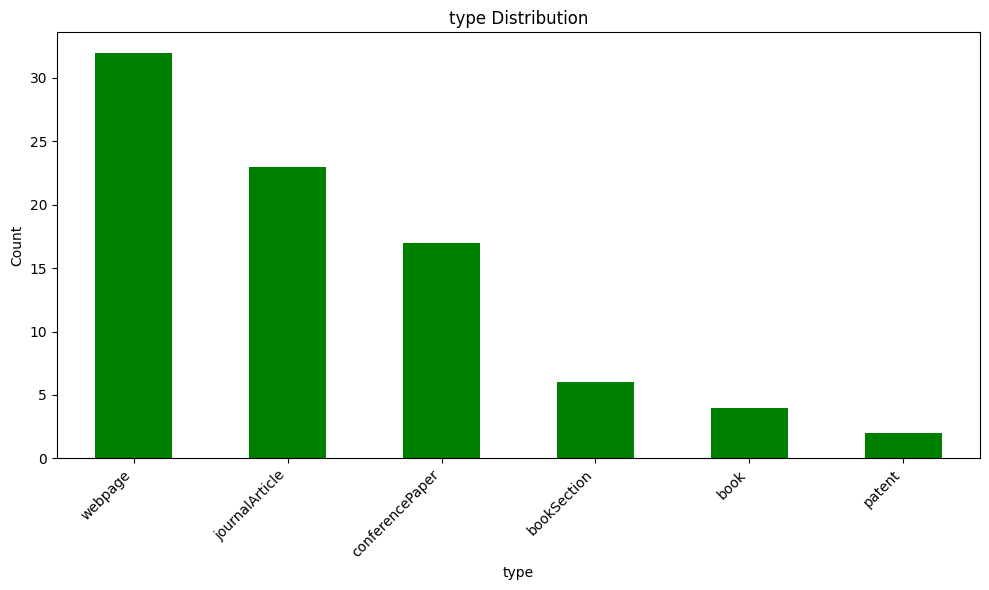

In [287]:
# Check the unique values in the 'Item Type' column
item_types = records_without_abstract['type'].unique()
# Count the occurrences of each item type
item_type_counts = records_without_abstract['type'].value_counts()
# Plot a bar chart
plt.figure(figsize=(10, 6))
item_type_counts.plot(kind='bar', color='green')
plt.title('type Distribution')
plt.xlabel('type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# Show the plot
plt.show()

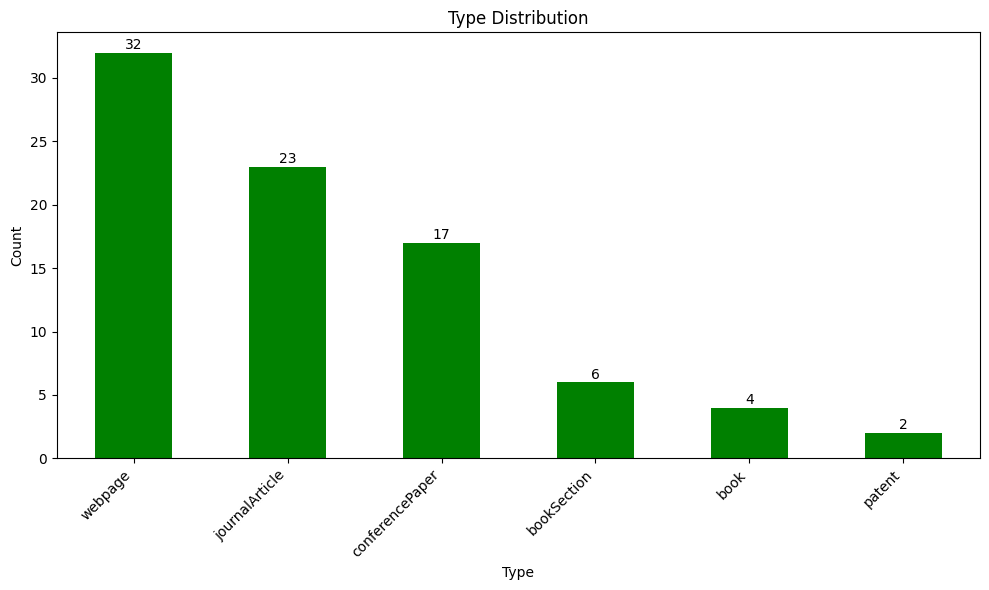

In [288]:
# Check the unique values in the 'Item Type' column
item_types = records_without_abstract['type'].unique()

# Count the occurrences of each item type
item_type_counts = records_without_abstract['type'].value_counts()

# Plot a bar chart
plt.figure(figsize=(10, 6))
bars = item_type_counts.plot(kind='bar', color='green')

# Add data labels to the bars
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, 
             f'{int(bar.get_height())}', ha='center', va='bottom')

plt.title('Type Distribution')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

In [289]:
# Initialize an empty list to store the links
links_array = []

# Iterate over each record in records_without_abstract
for index, row in records_without_abstract.iterrows():
    # Extract the link from the record and append it to the list
    link = row['link']
    links_array.append(link)

# Display the array of links
print(links_array)

['https://ieeexplore.ieee.org/abstract/document/4724802/', 'https://ieeexplore.ieee.org/abstract/document/5254392/', 'https://ieeexplore.ieee.org/abstract/document/4076126/', 'https://ojs.aaai.org/aimagazine/index.php/aimagazine/article/view/433', 'https://www.sciencedirect.com/science/article/pii/S1389128616301621', 'https://www.ej-ai.org/index.php/ejai/article/view/15', 'https://ieeexplore.ieee.org/abstract/document/7379806', 'https://doi.org/10.1108/lhtn.2003.23920fac.002', 'https://doi.org/10.1108/el.2000.18.2.137.7', 'https://www.google.com/search?q=problems+of+ownership+in+tech&rlz=1C1KNTJ_enNG1061NG1061&oq=problems+of+ownership+in+tech&gs_lcrp=EgZjaHJvbWUyBggAEEUYOTIHCAEQIRigATIHCAIQIRigAdIBCTE2NDY3ajBqNKgCALACAA&sourceid=chrome&ie=UTF-8', 'https://www.ownershipassociates.com/challeng.shtm', 'https://swimm.io/learn/code-collaboration/code-ownership-challenges-and-solutions', 'https://www.sciencedirect.com/science/article/pii/B9780124158153000157', 'https://www.sciencedirect.com/

In [290]:
len(links_array)

84

In [293]:
# List of website URLs
links_array

# Function to scrape and summarize articles
def scrape_and_summarize(url):
    try:
        # Create a configuration to set language and browser user agent
        config = Config()
        config.browser_user_agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36'
        config.language = 'en'  # Set the language of the news article
        
        # Create an Article object
        article = Article(url, config=config)
        
        # Download the article content
        article.download()
        
        # Parse the article
        article.parse()
        
        # Get the article text
        article_text = article.text
        
        # Create a parser
        parser = PlaintextParser.from_string(article_text, Tokenizer('english'))
        
        # Create an LSA Summarizer
        summarizer = LsaSummarizer()
        
        # Get the summary (adjust the number of sentences as needed)
        summary = summarizer(parser.document, 3)
        
        return article_text, " ".join([str(sentence) for sentence in summary])
    
    except Exception as e:
        print(f"An error occurred: {e}")
        return None, None

# Create an empty DataFrame
df = pd.DataFrame(columns=['link', 'article text', 'summary'])

# Apply the function to each URL and add the data to the DataFrame
data_to_append = []
for url in links_array:
    article_text, summary = scrape_and_summarize(url)
    data_to_append.append({'link': url, 'article text': article_text, 'summary': summary})

# Concatenate the new data with the existing DataFrame
df = pd.concat([df, pd.DataFrame(data_to_append)], ignore_index=True)

# Display the DataFrame
print(df.head(15)) 


An error occurred: Article `download()` failed with 403 Client Error: Forbidden for url: https://www.sciencedirect.com/science/article/pii/S1389128616301621 on URL https://www.sciencedirect.com/science/article/pii/S1389128616301621
An error occurred: Article `download()` failed with 403 Client Error: Forbidden for url: https://www.sciencedirect.com/science/article/pii/B9780124158153000157 on URL https://www.sciencedirect.com/science/article/pii/B9780124158153000157
An error occurred: Article `download()` failed with 403 Client Error: Forbidden for url: https://www.sciencedirect.com/topics/computer-science/data-confidentiality on URL https://www.sciencedirect.com/topics/computer-science/data-confidentiality
An error occurred: Article `download()` failed with 403 Client Error: Forbidden for url: https://www.sciencedirect.com/science/article/abs/pii/S1570870519304202 on URL https://www.sciencedirect.com/science/article/abs/pii/S1570870519304202
An error occurred: Article `download()` fail

In [295]:
# Merge the DataFrames on the 'URL' column to update the abstract in corpusDF
corpusDF = corpusDF.merge(df[['link', 'summary']], on='link', how='left')

# Replace the abstract of columns without abstract with the Summary column
corpusDF.loc[corpusDF['abstract'].isna() | (corpusDF['abstract'] == ''), 'abstract'] = corpusDF['summary']

# Drop the 'Summary' column as it's no longer needed
corpusDF.drop(columns=['summary'], inplace=True)

# Display the updated corpusDF
print(corpusDF)

                                                 title  \
0    visibility and digital art blockchain as an ow...   
1    enhanced rfid security method with ownership t...   
2    a new rfid authentication protocol with owners...   
3    an efficient and secure rfid security method w...   
4    evolution of consumption a psychological owner...   
..                                                 ...   
290  a review of code reviewer recommendation studi...   
291                          a dual model of ownership   
292          titeleiinhaltsverzeichnis  nomos elibrary   
293  the ownership problems of overlaps in european...   
294                who gets credit for aigenerated art   

                                              abstract  \
0    abstract             visibility of digital art...   
1                                                        
2                                                        
3                                                        
4    technolo

In [296]:
# Drop rows where 'link' column is NaN or empty. This is for the whole or merged corpus and not on only records without abstract
corpusDF = corpusDF.dropna(subset=['link'])

# Display the updated corpusDF
len(corpusDF)

280

In [297]:
print(corpusDF.head(10))

                                               title  \
0  visibility and digital art blockchain as an ow...   
1  enhanced rfid security method with ownership t...   
2  a new rfid authentication protocol with owners...   
3  an efficient and secure rfid security method w...   
4  evolution of consumption a psychological owner...   
5      artificial intelligence employment and income   
6    rfid ownership transfer protocol based on cloud   
7  artificial intelligence produced original work...   
8  ownership structure corporate governance and f...   
9  code ownership and software quality a replicat...   

                                            abstract  \
0  abstract             visibility of digital art...   
1                                                      
2                                                      
3                                                      
4  technological innovations are creating new pro...   
5  In this article we explore how AI is likely 

In [298]:
# Drop rows where 'abstract' column is NaN
corpusDF = corpusDF.dropna(subset=['abstract'])

# Display the updated corpusDF
len(corpusDF)

263

In [301]:
# Download WordNet for synonym lookup
nltk.download('wordnet')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# List of research keywords
research_keywords_RQs = [
    'data', 'data privacy', 'source code', 'repository', 'ownership', 'ownership challenges',
    'data ownership', 'data problems', 'IT challenges', 'IT ownership', 'software ownership challenges',
    'digital asset problems', 'ownership management', 'ownership ideas', 'IT management',
    'ownership strategies', 'IT assignment', 'IT asset management', 'digital assets',
    'intellectual property assets', 'data assets', 'open-source softwares', 'cloud base assets',
    'software assets'
]

# Function to find synonyms and expand keywords
def get_expanded_keywords(keywords):
    expanded_keywords = set()
    keyword_synonyms_dict = {}

    for keyword in keywords:
        # Get synonyms
        synonyms = set()
        for syn in wordnet.synsets(keyword):
            for lemma in syn.lemmas():
                synonyms.add(lemma.name().replace('_', ' '))
        
        # Lemmatize and add to the expanded set
        lemmatized_keyword = lemmatizer.lemmatize(keyword.lower())
        expanded_keywords.update(synonyms)
        expanded_keywords.add(lemmatized_keyword)

        # Store synonyms
        keyword_synonyms_dict[keyword] = synonyms

    return expanded_keywords, keyword_synonyms_dict

# Get expanded keywords and their synonyms
expanded_keywords, keyword_synonyms_dict = get_expanded_keywords(research_keywords_RQs)

# Display the keywords and their synonyms
for keyword, synonyms in keyword_synonyms_dict.items():
    print(f"Keyword: {keyword}")
    print(f"Synonyms: {', '.join(synonyms)}")
    print("-" * 50)  # Separator for readability

# Function to count occurrences of keywords in a text
def count_research_keywords(text, keywords):
    text_lemmatized = ' '.join([lemmatizer.lemmatize(word) for word in text.lower().split()])
    return sum(keyword in text_lemmatized for keyword in keywords)

# Assuming 'corpusDF' is your DataFrame containing the 'abstract' column
# Apply the function to count occurrences
corpusDF['keyword_count'] = corpusDF['abstract'].apply(lambda text: count_research_keywords(text, expanded_keywords))

# Display the DataFrame with keyword counts
print(corpusDF[['title', 'keyword_count']])


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Oladele\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Keyword: data
Synonyms: data point, information, datum, data
--------------------------------------------------
Keyword: data privacy
Synonyms: 
--------------------------------------------------
Keyword: source code
Synonyms: 
--------------------------------------------------
Keyword: repository
Synonyms: depositary, monument, deposit, depository, secretary, repository
--------------------------------------------------
Keyword: ownership
Synonyms: possession, ownership
--------------------------------------------------
Keyword: ownership challenges
Synonyms: 
--------------------------------------------------
Keyword: data ownership
Synonyms: 
--------------------------------------------------
Keyword: data problems
Synonyms: 
--------------------------------------------------
Keyword: IT challenges
Synonyms: 
--------------------------------------------------
Keyword: IT ownership
Synonyms: 
--------------------------------------------------
Keyword: software ownership challenges
Sy

In [302]:
# Assuming 'title' is the column name for the document titles
# and 'abstract' is the column for the document content

for index, row in corpusDF.iterrows():
    title = row['title']
    abstract = row['abstract']
    keyword_count = row['keyword_count']
    
    print(f"Title: {title}")
    print(f"Document: {abstract}")
    print(f"Number of Keywords Present: {keyword_count}")
    print("-" * 50)  # Separator for readability


Title: visibility and digital art blockchain as an ownership layer on the internet
Document: abstract             visibility of digital art and its ownership can be achieved using blockchain technology as part of a broader solution for the identification attribution and payment for digital work a case study is provided of a firm using the bitcoin blockchain as part of an integrated solution to identify and authenticate ownership of digital property an integrated ownership ledger allows for secure attribution transfer and provenance of digital property blockchain technology enables limitededition digital property while internetscale web crawl and machine learning shows where and how works are being used on the internet
Number of Keywords Present: 2
--------------------------------------------------
Title: enhanced rfid security method with ownership transfer
Document: 
Number of Keywords Present: 0
--------------------------------------------------
Title: a new rfid authentication proto

In [303]:
# Inclusion criteria
filtered_corpusDF = corpusDF[
    (
        
        # #loop through the research keywords and check if it exists in the abstract
        corpusDF['abstract'].str.contains('|'.join(research_keywords_RQs), case=False)
    ) &
    (
        # Studies whose timeframe > year 2010
        corpusDF['year'] > 2010
    ) &
    (
        # Studies that include two or more research keywords
        corpusDF['keyword_count'] >= 2
    )

# &
 #   (
        # Studies that include two or more research keywords
 #       corpusDF['abstract'].str.contains(' literature review', case=False)
#    )
]

# Display the number of inclusion filtered records
print("Number of Inclusion Filtered Records:", len(filtered_corpusDF))


Number of Inclusion Filtered Records: 50


In [304]:
#Preprocessabstracts for natural language processing
# removing stop words,punctuation and applying lematization to the abstract

# Assuming 'filtered_corpusDF' contains a column named 'abstract' with abstract text

def preprocess_abstract(abstract):
    # Tokenize the abstract by spliting the text into individual words
    tokens = word_tokenize(abstract.lower())  # Convert to lowercase
    
    # Remove punctuation
    tokens = [token for token in tokens if token not in string.punctuation]
    
    # Remove stop words(removing the words like the, is , and)
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatization (reducing words to their base form running becomes run, better becomes good)
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Join tokens back into a single string
    preprocessed_abstract = ' '.join(tokens)
    
    return preprocessed_abstract

# Apply preprocessing to the 'abstract' column and store the result in a new column 'ProcessedText'
filtered_corpusDF['ProcessedText'] = filtered_corpusDF['abstract'].apply(preprocess_abstract)

# Display the DataFrame with the preprocessed abstracts
print(filtered_corpusDF[['abstract', 'ProcessedText']])


                                              abstract  \
0    abstract             visibility of digital art...   
4    technological innovations are creating new pro...   
7    Copyright has rights and enforcement that are ...   
9    in a traditional sense ownership determines ri...   
10   having in mind that data constitute the key as...   
13   social data produced from widely emerged socia...   
14   in discourses on digitization and the data eco...   
27   the purpose of this study is to examine the em...   
32   every human handwriting has different characte...   
33   data deduplication has been widely used in clo...   
35   the influence factors of corporate value have ...   
37   the advent of machine to machine communication...   
38   refactoring the activity of changing source co...   
41   as internet of things iot becomes a growing re...   
51   the concept of data ownership is becoming incr...   
54   environmental pollution and climate warming ha...   
60   purpose  

C:\Users\Oladele\AppData\Local\Temp\ipykernel_14116\2485296465.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_corpusDF['ProcessedText'] = filtered_corpusDF['abstract'].apply(preprocess_abstract)


In [305]:
len(filtered_corpusDF[['abstract', 'ProcessedText']])

50

**CREATING A CORPUS USING TF-IDF VECTORIZER**

In [306]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Assuming 'filtered_corpusDF' contains a column 'ProcessedText' with preprocessed text
vectorizer = TfidfVectorizer()

# Fit the vectorizer on the processed text and transform the text into a TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(filtered_corpusDF['ProcessedText'])

# Get feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()  # Corrected to get_feature_names_out

# Create a DataFrame for the corpus using the TF-IDF matrix and feature names
corpus_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Display the feature names (optional)
print("Feature Names (Words):", feature_names)

# Display the corpus DataFrame
print(corpus_df)


Feature Names (Words): ['25' '30' '50' ... 'zoom' 'ﬁnal' 'ﬁnd']
          25        30        50      able  abstract  abstraction  academia  \
0   0.000000  0.000000  0.000000  0.000000  0.099209     0.000000  0.000000   
1   0.000000  0.000000  0.000000  0.000000  0.000000     0.000000  0.000000   
2   0.000000  0.000000  0.000000  0.000000  0.000000     0.000000  0.000000   
3   0.000000  0.000000  0.000000  0.055208  0.000000     0.000000  0.000000   
4   0.000000  0.000000  0.000000  0.000000  0.000000     0.000000  0.000000   
5   0.000000  0.000000  0.000000  0.000000  0.000000     0.000000  0.000000   
6   0.000000  0.000000  0.000000  0.000000  0.000000     0.000000  0.000000   
7   0.000000  0.000000  0.000000  0.000000  0.000000     0.000000  0.000000   
8   0.000000  0.000000  0.000000  0.000000  0.000000     0.000000  0.000000   
9   0.000000  0.000000  0.000000  0.000000  0.000000     0.000000  0.000000   
10  0.000000  0.000000  0.000000  0.000000  0.000000     0.000000  

**Keyword Extraction Using TF.IDF**

In [307]:
import numpy as np

# List to store the top keywords for each document
top_keywords_per_document = []


# Get the top 5 keywords for each document top_keywords_per_document = []

# Number of top keywords to extract
num_top_keywords = 5

# Loop through each document
for i in range(len(corpus_df)):
    # Get the TF-IDF values for the document
    row_data = tfidf_matrix[i]

    # Sort the indices of the TF-IDF values in descending order
    sorted_indices = np.argsort(row_data.data)[-num_top_keywords:]

    # Get the corresponding feature indices (keywords)
    top_indices = row_data.indices[sorted_indices]

    # Get the corresponding keywords using the indices
    top_keywords = [feature_names[idx] for idx in top_indices]
    
    # Append the list of top keywords for the document
    top_keywords_per_document.append(top_keywords)

# Add the top keywords to your DataFrame
corpus_df['Keywords'] = top_keywords_per_document

# Display the DataFrame with the added Keywords column
print(corpus_df[['Keywords']])


                                             Keywords
0   [attribution, integrated, property, blockchain...
1   [replacing, consumption, service, good, psycho...
2   [legislative, deserves, grounded, jurisdiction...
3                  [usually, et, al, ownership, code]
4        [unit, domain, owner, component, functional]
5           [user, application, data, medium, social]
6                 [argue, subject, call, data, claim]
7     [firm, effect, industrial, contextual, setting]
8    [cell, image, feature, handwriting, handwritten]
9   [management, efficient, pow, scheme, deduplica...
10      [industry, listed, company, structure, value]
11             [given, towards, reality, city, smart]
12  [developer, activity, considered, software, re...
13                       [life, home, hdi, data, iot]
14                  [world, know, sure, digial, zoom]
15  [unit, industrial, enterprise, intensity, energy]
16           [management, one, company, data, master]
17   [independence, ownershi

In [308]:
from collections import Counter

# Assuming 'TopKeywords' is the column containing lists of keywords 
corpus_df['KeywordCounts'] = corpus_df['Keywords'].apply(Counter)

# Display the DataFrame with keyword counts
corpus_df[['title', 'KeywordCounts']]


,title,KeywordCounts
0,0.000000,"{'attribution': 1, 'integrated': 1, 'property'..."
1,0.000000,"{'replacing': 1, 'consumption': 1, 'service': ..."
2,0.000000,"{'legislative': 1, 'deserves': 1, 'grounded': ..."
3,0.000000,"{'usually': 1, 'et': 1, 'al': 1, 'ownership': ..."
4,0.000000,"{'unit': 1, 'domain': 1, 'owner': 1, 'componen..."
5,0.000000,"{'user': 1, 'application': 1, 'data': 1, 'medi..."
6,0.000000,"{'argue': 1, 'subject': 1, 'call': 1, 'data': ..."
7,0.000000,"{'firm': 1, 'effect': 1, 'industrial': 1, 'con..."
8,0.000000,"{'cell': 1, 'image': 1, 'feature': 1, 'handwri..."
9,0.000000,"{'management': 1, 'efficient': 1, 'pow': 1, 's..."


In [309]:
# Function to find synonyms
def get_synonyms(keyword):
    synonyms = set()
    for syn in wordnet.synsets(keyword):
        for lemma in syn.lemmas():
            synonyms.add(lemma.name().replace('_', ' '))
    #return synonyms
    return list(synonyms)

# Apply the function to each keyword in 'KeywordCounts' column
corpus_df['Synonyms'] = corpus_df['KeywordCounts'].apply(lambda keywords: {word: get_synonyms(word) for word in keywords.keys()})

# Display DataFrame with synonyms column
corpus_df[['title', 'KeywordCounts', 'Synonyms']]


,title,KeywordCounts,Synonyms
0,0.000000,"{'attribution': 1, 'integrated': 1, 'property'...","{'attribution': ['attribution', 'ascription'],..."
1,0.000000,"{'replacing': 1, 'consumption': 1, 'service': ...","{'replacing': ['replacing', 'substitute', 'sup..."
2,0.000000,"{'legislative': 1, 'deserves': 1, 'grounded': ...","{'legislative': ['legislative'], 'deserves': [..."
3,0.000000,"{'usually': 1, 'et': 1, 'al': 1, 'ownership': ...","{'usually': ['usually', 'unremarkably', 'ordin..."
4,0.000000,"{'unit': 1, 'domain': 1, 'owner': 1, 'componen...","{'unit': ['unit of measurement', 'social unit'..."
5,0.000000,"{'user': 1, 'application': 1, 'data': 1, 'medi...","{'user': ['user', 'exploiter', 'substance abus..."
6,0.000000,"{'argue': 1, 'subject': 1, 'call': 1, 'data': ...","{'argue': ['indicate', 'debate', 'fence', 'rea..."
7,0.000000,"{'firm': 1, 'effect': 1, 'industrial': 1, 'con...","{'firm': ['immobile', 'house', 'stiff', 'fast'..."
8,0.000000,"{'cell': 1, 'image': 1, 'feature': 1, 'handwri...","{'cell': ['cellular telephone', 'cellular phon..."
9,0.000000,"{'management': 1, 'efficient': 1, 'pow': 1, 's...","{'management': ['management', 'direction'], 'e..."


**Cosine SIMILARITY**

In [310]:
import pandas as pd

# Convert the cosine similarity matrix to a DataFrame for easier inspection
cosine_sim_df = pd.DataFrame(cosine_similarities, index=corpus_df.index, columns=corpus_df.index)

# Display the cosine similarity matrix
print(cosine_sim_df)



          0         1         2         3         4         5         6   \
0   1.000000  0.044376  0.042008  0.044407  0.011689  0.040861  0.052350   
1   0.044376  1.000000  0.028002  0.054055  0.032654  0.037337  0.069420   
2   0.042008  0.028002  1.000000  0.029981  0.011926  0.011874  0.017770   
3   0.044407  0.054055  0.029981  1.000000  0.085912  0.031493  0.057571   
4   0.011689  0.032654  0.011926  0.085912  1.000000  0.094741  0.116140   
5   0.040861  0.037337  0.011874  0.031493  0.094741  1.000000  0.102886   
6   0.052350  0.069420  0.017770  0.057571  0.116140  0.102886  1.000000   
7   0.038820  0.089257  0.016206  0.046673  0.031563  0.050472  0.045059   
8   0.023536  0.026675  0.005068  0.040078  0.063318  0.073812  0.080971   
9   0.037834  0.046863  0.024090  0.053187  0.048295  0.089501  0.076474   
10  0.017289  0.052297  0.047564  0.030713  0.058546  0.036084  0.029750   
11  0.044584  0.023152  0.029775  0.026075  0.052041  0.091098  0.074136   
12  0.023869

In [311]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate the cosine similarity matrix
cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Display the cosine similarity matrix
print(cosine_similarities)


[[1.         0.04437633 0.04200847 ... 0.         0.01750378 0.05517788]
 [0.04437633 1.         0.0280015  ... 0.05358104 0.06389256 0.03850622]
 [0.04200847 0.0280015  1.         ... 0.04383262 0.05061298 0.03068015]
 ...
 [0.         0.05358104 0.04383262 ... 1.         0.06487387 0.01200606]
 [0.01750378 0.06389256 0.05061298 ... 0.06487387 1.         0.07724543]
 [0.05517788 0.03850622 0.03068015 ... 0.01200606 0.07724543 1.        ]]


**Similar Document Using Cosine Similarity**

In [312]:
threshold = 0.08
similar_documents = []

for i in range(len(cosine_similarities)):
    # Find indices of documents with cosine similarity greater than the threshold
    similar_indices = (cosine_similarities[i] > threshold).nonzero()[0]
    
    # Append the document and its similar documents to the list
    similar_documents.append({
        'Document': i,
        'Similar Documents': similar_indices.tolist()
    })

# Display the list of similar documents
print(similar_documents)


[{'Document': 0, 'Similar Documents': [0, 33, 46]}, {'Document': 1, 'Similar Documents': [1, 7, 22, 32, 42]}, {'Document': 2, 'Similar Documents': [2]}, {'Document': 3, 'Similar Documents': [3, 4, 12, 23, 31, 35, 37, 43, 49]}, {'Document': 4, 'Similar Documents': [3, 4, 5, 6, 15, 16, 22, 23, 25, 26, 37, 41, 42, 43, 44]}, {'Document': 5, 'Similar Documents': [4, 5, 6, 9, 11, 13, 16, 17, 22, 24, 29, 31, 37, 41, 42]}, {'Document': 6, 'Similar Documents': [4, 5, 6, 8, 13, 14, 16, 22, 23, 24, 26, 33, 41, 42, 44, 47, 48, 49]}, {'Document': 7, 'Similar Documents': [1, 7, 15, 17, 43, 49]}, {'Document': 8, 'Similar Documents': [6, 8, 28, 41]}, {'Document': 9, 'Similar Documents': [5, 9, 16, 26]}, {'Document': 10, 'Similar Documents': [10, 15, 16, 17, 21, 29]}, {'Document': 11, 'Similar Documents': [5, 11, 13, 20, 22, 23]}, {'Document': 12, 'Similar Documents': [3, 12, 43, 49]}, {'Document': 13, 'Similar Documents': [5, 6, 11, 13, 16, 17, 20, 21, 22, 24, 26, 33, 41, 42, 47, 48]}, {'Document': 14

In [313]:
# Now, similar_documents contains information about documents with high similarity. 
similar_documents

[{'Document': 0, 'Similar Documents': [0, 33, 46]},
 {'Document': 1, 'Similar Documents': [1, 7, 22, 32, 42]},
 {'Document': 2, 'Similar Documents': [2]},
 {'Document': 3, 'Similar Documents': [3, 4, 12, 23, 31, 35, 37, 43, 49]},
 {'Document': 4,
  'Similar Documents': [3,
   4,
   5,
   6,
   15,
   16,
   22,
   23,
   25,
   26,
   37,
   41,
   42,
   43,
   44]},
 {'Document': 5,
  'Similar Documents': [4,
   5,
   6,
   9,
   11,
   13,
   16,
   17,
   22,
   24,
   29,
   31,
   37,
   41,
   42]},
 {'Document': 6,
  'Similar Documents': [4,
   5,
   6,
   8,
   13,
   14,
   16,
   22,
   23,
   24,
   26,
   33,
   41,
   42,
   44,
   47,
   48,
   49]},
 {'Document': 7, 'Similar Documents': [1, 7, 15, 17, 43, 49]},
 {'Document': 8, 'Similar Documents': [6, 8, 28, 41]},
 {'Document': 9, 'Similar Documents': [5, 9, 16, 26]},
 {'Document': 10, 'Similar Documents': [10, 15, 16, 17, 21, 29]},
 {'Document': 11, 'Similar Documents': [5, 11, 13, 20, 22, 23]},
 {'Document': 12, 'Sim

**Evaluation Metrics**

In [314]:
print(corpus_df)

          25        30        50      able  abstract  abstraction  academia  \
0   0.000000  0.000000  0.000000  0.000000  0.099209     0.000000  0.000000   
1   0.000000  0.000000  0.000000  0.000000  0.000000     0.000000  0.000000   
2   0.000000  0.000000  0.000000  0.000000  0.000000     0.000000  0.000000   
3   0.000000  0.000000  0.000000  0.055208  0.000000     0.000000  0.000000   
4   0.000000  0.000000  0.000000  0.000000  0.000000     0.000000  0.000000   
5   0.000000  0.000000  0.000000  0.000000  0.000000     0.000000  0.000000   
6   0.000000  0.000000  0.000000  0.000000  0.000000     0.000000  0.000000   
7   0.000000  0.000000  0.000000  0.000000  0.000000     0.000000  0.000000   
8   0.000000  0.000000  0.000000  0.000000  0.000000     0.000000  0.000000   
9   0.000000  0.000000  0.000000  0.000000  0.000000     0.000000  0.000000   
10  0.000000  0.000000  0.000000  0.000000  0.000000     0.000000  0.086077   
11  0.000000  0.000000  0.000000  0.000000  0.000000

In [318]:
import pandas as pd
# The document is considered relevant if any of the keywords is present in the title or abstract 
# Assuming 'corpus_df' is your DataFrame and 'keywords_list' is your list of keywords
research_keywords_RQs = ['data', 'data privacy', 'source code', 'repository', 'ownership', 'ownership challenges',
                     'data ownership', 'data problems', 'IT challenges', 'IT ownership', 'software ownership challenges', 
                     'digital asset problems', 'ownership management', 'ownership ideas', 'IT management', 
                     'ownership strategies', 'IT assignment', 'IT asset management', 'digital assets', 
                     'intellectual property assets', 'data assets', 'open-source softwares', 'cloud base assets', 
                     'software assets']

# Drop rows where either 'title' or 'abstract' is NaN
corpus_df = filtered_corpusDF.dropna(subset=['title', 'abstract'])

# Convert keywords list to a list of lowercase keywords for case-insensitive comparison
keywords_list = [keyword.lower() for keyword in research_keywords_RQs]

# Compute relevance for each document
corpus_df['Relevance'] = [
    1 if any(keyword in title.lower() or keyword in abstract.lower() for keyword in keywords_list) else 0
    for title, abstract in zip(corpus_df['title'], corpus_df['abstract'])
]

# Display the DataFrame with the assigned labels
print(corpus_df[['title', 'Relevance']])


                                                 title  Relevance
0    visibility and digital art blockchain as an ow...          1
4    evolution of consumption a psychological owner...          1
7    artificial intelligence produced original work...          1
9    code ownership and software quality a replicat...          1
10          data ownership model for a telecom company          1
13   socialchain decoupling social data and applica...          1
14      own data ethical reflections on data ownership          1
27   insider ownership and firm performance a resou...          1
32   handwriting ownership recognition using contra...          1
33   secure and efficient cloud data deduplication ...          1
35   ownership structure industry protection and co...          1
37     hdi based data ownership model for smart cities          1
38   a case study on the relationship between code ...          1
41   human data interaction in iot the ownership as...          1
51     dat

In [323]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Set a threshold to determine relevance based on cosine similarity
threshold = 0.08

# Predicted labels based on cosine similarity
predicted_labels = [1 if max(similarity_scores) >= threshold else 0 for similarity_scores in cosine_similarities]

# Initialize lists to store precision, recall, and f1 scores
precision_scores = []
recall_scores = []
f1_scores = []

# Ensure that 'Relevance' column exists and contains the correct values
print("Columns in corpus_df:", corpus_df.columns)
#print(corpus_df.head())

# Evaluate precision, recall, and f1 score for each row
for i in range(len(corpus_df)):
    true_label = corpus_df.iloc[i]['Relevance']  # Use iloc for positional indexing
    predicted_label = predicted_labels[i]
    
    # Calculate precision, recall, and f1 score for each row
    precision = precision_score([true_label], [predicted_label], zero_division=0)
    recall = recall_score([true_label], [predicted_label], zero_division=0)
    f1 = f1_score([true_label], [predicted_label], zero_division=0)
    
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Add the predicted labels and scores to your DataFrame
corpus_df['PredictedLabels'] = predicted_labels
corpus_df['Precision'] = precision_scores
corpus_df['Recall'] = recall_scores
corpus_df['F1 Score'] = f1_scores

# Print evaluation metrics for each row
print(corpus_df[['title', 'PredictedLabels', 'Precision', 'Recall', 'F1 Score']])


Columns in corpus_df: Index(['title', 'abstract', 'author', 'year', 'type', 'link', 'pages',
       'language', 'catalogs', 'keyword_count', 'ProcessedText', 'Relevance',
       'PredictedLabels', 'Precision', 'Recall', 'F1 Score'],
      dtype='object')
                                                 title  PredictedLabels  \
0    visibility and digital art blockchain as an ow...                1   
4    evolution of consumption a psychological owner...                1   
7    artificial intelligence produced original work...                1   
9    code ownership and software quality a replicat...                1   
10          data ownership model for a telecom company                1   
13   socialchain decoupling social data and applica...                1   
14      own data ethical reflections on data ownership                1   
27   insider ownership and firm performance a resou...                1   
32   handwriting ownership recognition using contra...                

In [321]:
# Save the new DataFrame to a new CSV file
corpus_df[["title", "abstract", "year", "keyword_count", "F1 Score"]].to_csv('ThesisCodes.csv', index=False)
